In [393]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


In [7]:
results = pd.read_csv('results.csv')
advertisers = pd.read_csv('advertisers.csv')
locations = pd.read_csv('locations.csv')


In [50]:
results.head(6)

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0
5,6,6.0,Assam,Kaziranga,2050126,79.33,1626408,1.0


In [251]:
advertisers

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879
...,...,...,...,...,...
20827,104633268709556,If You Don't Bark,These ads ran without a disclaimer,≤100,2
20828,118271861357765,Story time,These ads ran without a disclaimer,≤100,1
20829,218017134738366,know_sacred_wisdom,These ads ran without a disclaimer,≤100,1
20830,270489126793,Energy Globe Award,These ads ran without a disclaimer,≤100,1


In [74]:
locations.head()

,Location name,Amount spent (INR)
0,andaman and nicobar islands,377858
1,andhra pradesh,100819732
2,arunachal pradesh,1385654
3,assam,17478091
4,bihar,53619242


In [100]:
results['State'] = results['State'].str.strip().str.lower()
locations['Location name'] = locations['Location name'].str.strip().str.lower()

In [120]:
merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head(550)

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


### Finding the total ad spend by state:

In [104]:
pio.templates.default = "plotly_white"

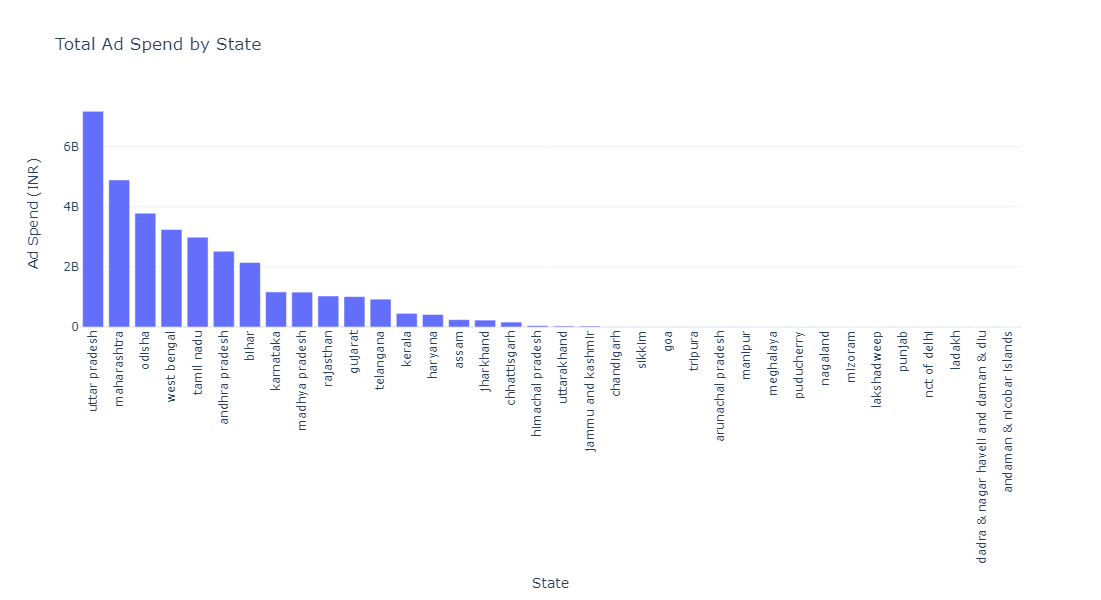

In [202]:
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

Spentfig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',
             labels={'Amount spent (INR)': 'Ad Spend (INR)'},
             title='Total Ad Spend by State')

Spentfig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

Spentfig.show()

### The average voter turnout by state:

In [248]:
statewise_polled = merged_data.groupby('State')['Polled (%)'].mean().sort_values(ascending=False).reset_index()
statewise_polled

,State,Polled (%)
0,lakshadweep,84.160000
1,tripura,80.920000
2,assam,80.882857
3,andhra pradesh,80.770800
4,sikkim,79.880000
5,west bengal,79.188095
6,puducherry,78.900000
7,arunachal pradesh,78.455000
8,manipur,78.030000
9,meghalaya,77.575000


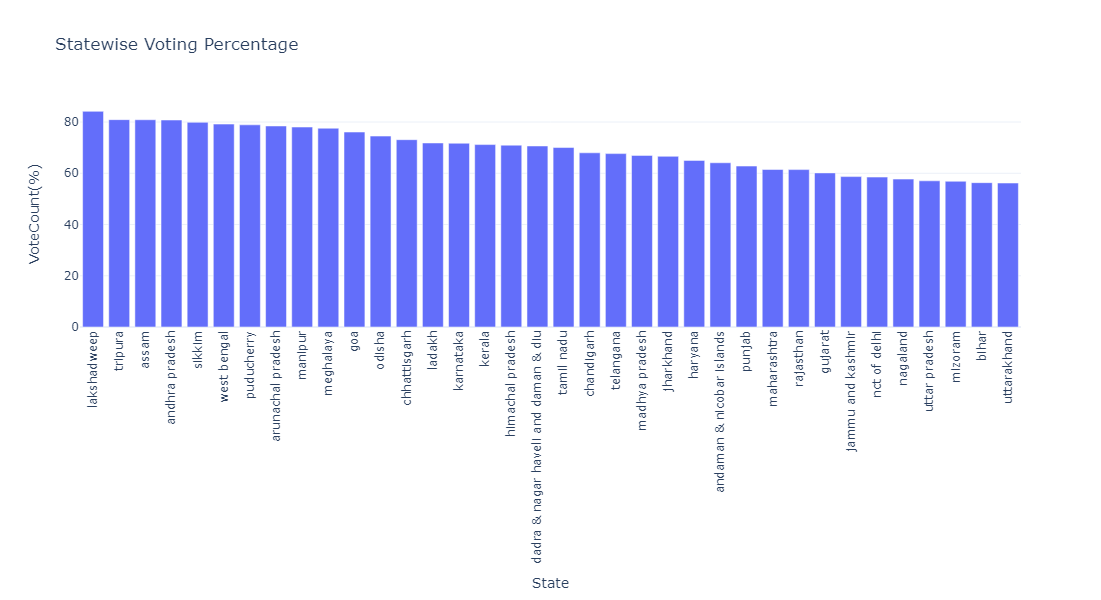

In [232]:
Polledfig = px.bar(statewise_polled, x='State', y='Polled (%)',
                  labels = {'Polled (%)': 'VoteCount(%)'},
                  title='Statewise Voting Percentage'
                  )
Polledfig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=1000,
                  height=600)

Polledfig.show()

### The top 5 parties by ad spend:

In [253]:
advertisers

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879
...,...,...,...,...,...
20827,104633268709556,If You Don't Bark,These ads ran without a disclaimer,≤100,2
20828,118271861357765,Story time,These ads ran without a disclaimer,≤100,1
20829,218017134738366,know_sacred_wisdom,These ads ran without a disclaimer,≤100,1
20830,270489126793,Energy Globe Award,These ads ran without a disclaimer,≤100,1


In [281]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)

advertisers

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342.0,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100.0,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399.0,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327.0,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499.0,879
...,...,...,...,...,...
12267,271345446057081,pen pencil ka job Ghar Baithe kar sakte ho 150...,These ads ran without a disclaimer,101.0,2
12268,171491159388294,drpriyankatulla,These ads ran without a disclaimer,101.0,1
12269,215226828333240,Old coin selling company in Mumbai India,These ads ran without a disclaimer,101.0,1
12270,121081480930086,RAHUL KUMAR SINGH,Faltech Services Private Limited,101.0,1


In [294]:
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
top_5_parties = party_ad_spend.head(5).reset_index()

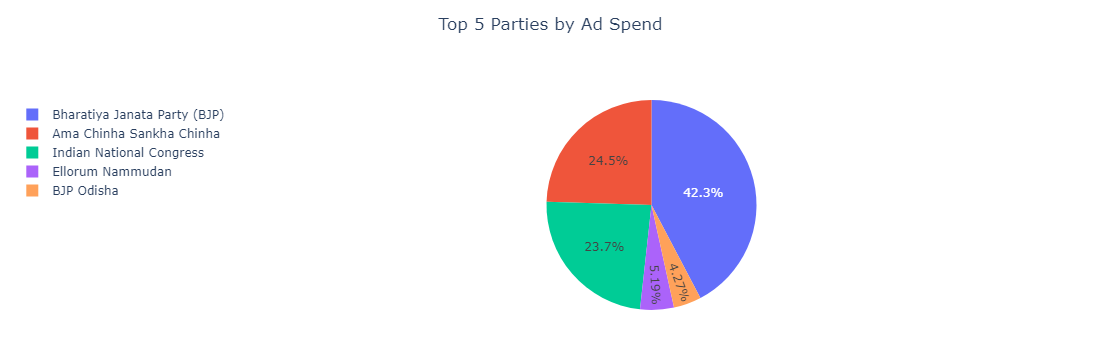

In [338]:
Top5PartiesAdSpentFig = px.pie(top_5_parties, values='Amount spent (INR)', names='Page name',
             title='Top 5 Parties by Ad Spend', #color_discrete_sequence=colors,
             labels={'Page name': 'Political Party', 'Amount spent (INR)': 'Ad Spend (INR)'})

Top5PartiesAdSpentFig.update_traces(textinfo='percent')

Top5PartiesAdSpentFig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=-0.3
    ),
    title=dict(
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    margin=dict(l=200, r=50, t=100, b=50) 
)


Top5PartiesAdSpentFig.show()

### Relationship Between VoteCount and Amount Spent


In [342]:
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
correlation

,Amount spent (INR),Polled (%)
Amount spent (INR),1.000000,-0.010688
Polled (%),-0.010688,1.000000


- This signifies increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

### Relationship between ad spend and voter turnout by parliamentary constituency:

In [350]:
merged_constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_constituency_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


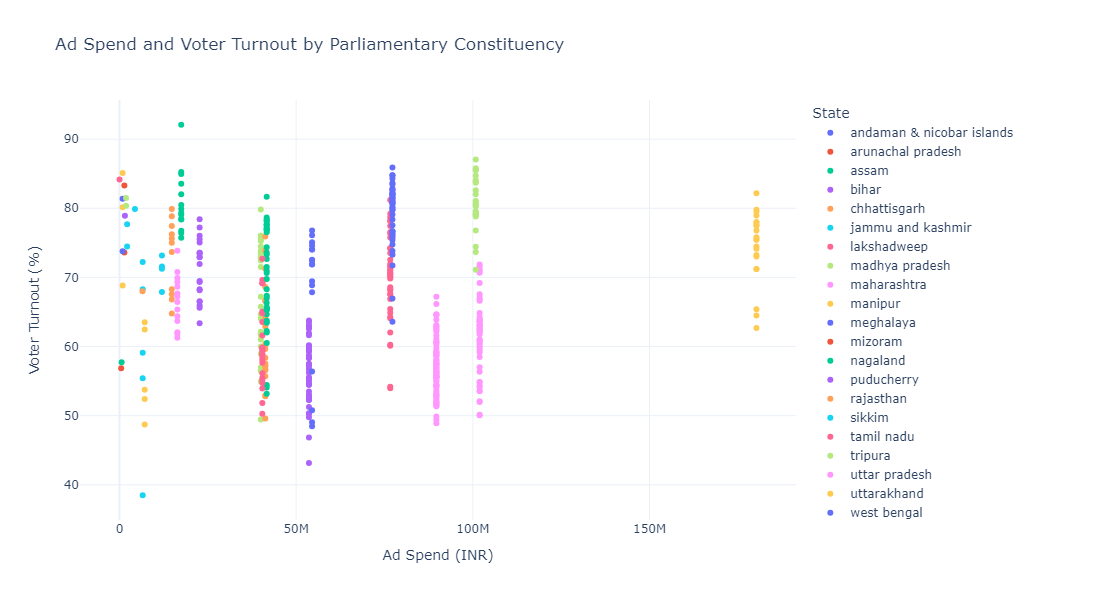

In [352]:
AdSpentVsVotefig = px.scatter(merged_constituency_data, x='Amount spent (INR)', y='Polled (%)',
                 color='State',
                 labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Polled (%)': 'Voter Turnout (%)'},
                 title='Ad Spend and Voter Turnout by Parliamentary Constituency')

AdSpentVsVotefig.update_layout(width=800, height=600)

AdSpentVsVotefig.show()

- It shows that higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

### The distribution of ad spending:

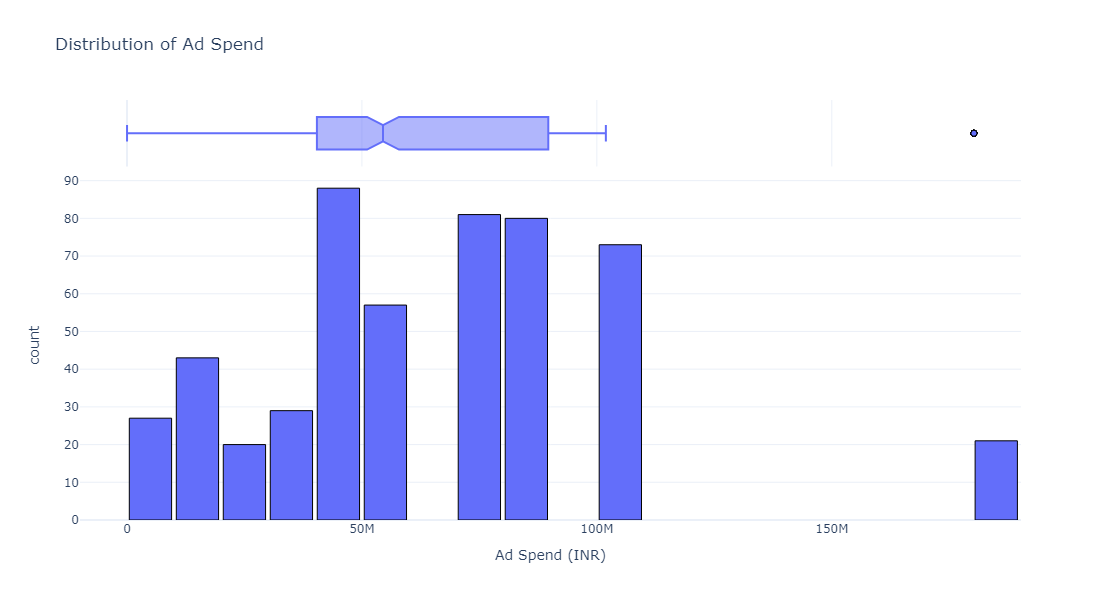

In [362]:
AdDistributionfig = px.histogram(merged_data, x='Amount spent (INR)', nbins=30, marginal='box',
                   labels={'Amount spent (INR)': 'Ad Spend (INR)'},
                   title='Distribution of Ad Spend')

AdDistributionfig.update_traces(marker=dict(line=dict(color='black', width=1)))
AdDistributionfig.update_layout(bargap=0.1, width=800, height=600)

AdDistributionfig.show()

- The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

### Ad spending and voter turnout by election phase:

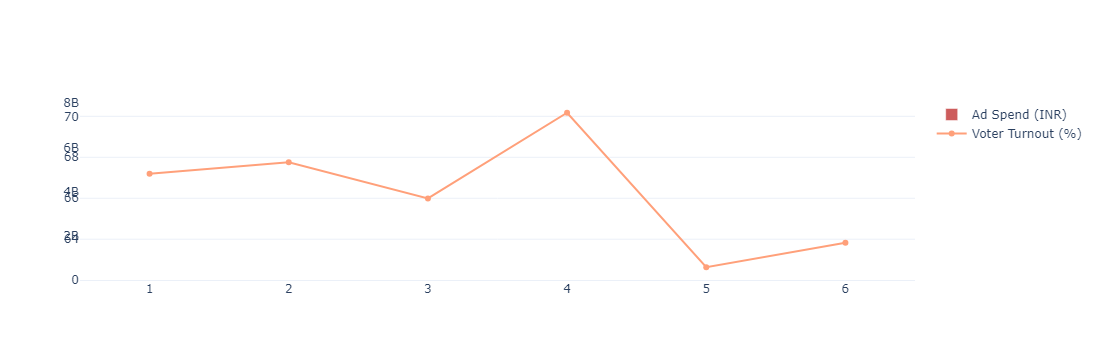

In [404]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_analysis['Phase'],
    y=phase_analysis['Amount spent (INR)'],
    name='Ad Spend (INR)',
    marker_color='indianred',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=phase_analysis['Phase'],
    y=phase_analysis['Polled (%)'],
    name='Voter Turnout (%)',
    marker_color='lightsalmon',
    yaxis='y2'
))

fig.show()

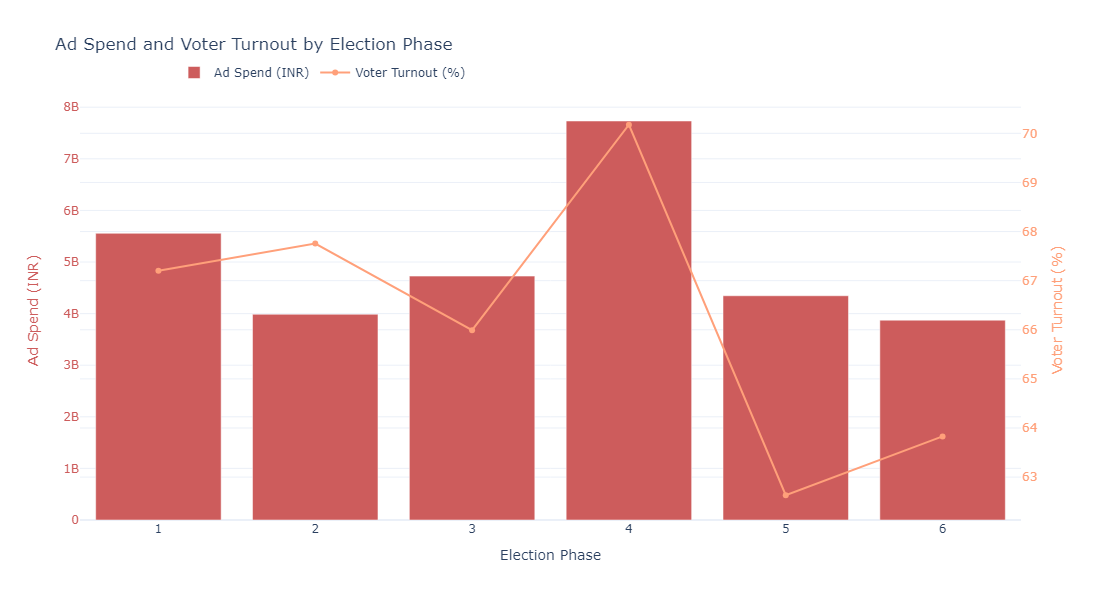

In [395]:


phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_analysis['Phase'],
    y=phase_analysis['Amount spent (INR)'],
    name='Ad Spend (INR)',
    marker_color='indianred',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=phase_analysis['Phase'],
    y=phase_analysis['Polled (%)'],
    name='Voter Turnout (%)',
    marker_color='lightsalmon',
    yaxis='y2'
))

fig.update_layout(
    title='Ad Spend and Voter Turnout by Election Phase',
    xaxis=dict(title='Election Phase'),
    yaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(color='indianred'),
        tickfont=dict(color='indianred')
    ),
    yaxis2=dict(
        title='Voter Turnout (%)',
        titlefont=dict(color='lightsalmon'),
        tickfont=dict(color='lightsalmon'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    width=800,
    height=600
)

fig.show()